In [15]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

In [3]:
# Import the API key
from config import weather_api_key

In [4]:
# Starting URL for WeatherMap API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5cc9ad261292a20b92a7bc8c2d2ac550


In [5]:
# Import the datetime module from the datetime library
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
## Added without prompt on module
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Use the citipy module to determin city based on latitude and longitude
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [9]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list
# for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
    
    # Create endpoint URL with each city
#    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        weather_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                         "Current Description": weather_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | griffith
Processing Record 4 of Set 1 | littleton
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | atar
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | amapa
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | kaeo
Processing Record 14 of Set 1 | minot
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | kropotkin
Processing Record 24 

Processing Record 40 of Set 4 | ribas do rio pardo
Processing Record 41 of Set 4 | komsomolskiy
Processing Record 42 of Set 4 | carnarvon
Processing Record 43 of Set 4 | batagay
Processing Record 44 of Set 4 | port elizabeth
Processing Record 45 of Set 4 | marawi
Processing Record 46 of Set 4 | mount isa
Processing Record 47 of Set 4 | basco
Processing Record 48 of Set 4 | coihaique
Processing Record 49 of Set 4 | miles city
Processing Record 50 of Set 4 | longlac
City not found. Skipping...
Processing Record 1 of Set 5 | keuruu
Processing Record 2 of Set 5 | kadykchan
City not found. Skipping...
Processing Record 3 of Set 5 | caucaia
Processing Record 4 of Set 5 | halalo
City not found. Skipping...
Processing Record 5 of Set 5 | ambilobe
Processing Record 6 of Set 5 | jamestown
Processing Record 7 of Set 5 | tortoli
Processing Record 8 of Set 5 | gangotri
City not found. Skipping...
Processing Record 9 of Set 5 | langarud
Processing Record 10 of Set 5 | woodward
Processing Record 11 o

Processing Record 25 of Set 8 | aykhal
Processing Record 26 of Set 8 | senno
Processing Record 27 of Set 8 | aklavik
Processing Record 28 of Set 8 | bambanglipuro
Processing Record 29 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 30 of Set 8 | svobodnyy
Processing Record 31 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 8 | cuyotenango
Processing Record 33 of Set 8 | malinovoye ozero
Processing Record 34 of Set 8 | vung tau
Processing Record 35 of Set 8 | san isidro
Processing Record 36 of Set 8 | waddan
Processing Record 37 of Set 8 | gweta
Processing Record 38 of Set 8 | bodden town
Processing Record 39 of Set 8 | makakilo city
Processing Record 40 of Set 8 | bubaque
Processing Record 41 of Set 8 | ostrovnoy
Processing Record 42 of Set 8 | geraldton
Processing Record 43 of Set 8 | coahuayana
Processing Record 44 of Set 8 | aksarka
Processing Record 45 of Set 8 | amahai
Processing Record 46 of Set 8 | fort nelson
Processin

Processing Record 7 of Set 12 | zhanakorgan
Processing Record 8 of Set 12 | chagda
City not found. Skipping...
Processing Record 9 of Set 12 | valparaiso
Processing Record 10 of Set 12 | sahrak
City not found. Skipping...
Processing Record 11 of Set 12 | la pintada
Processing Record 12 of Set 12 | pithoro
Processing Record 13 of Set 12 | ipixuna
Processing Record 14 of Set 12 | hohhot
Processing Record 15 of Set 12 | ntcheu
Processing Record 16 of Set 12 | acajutla
Processing Record 17 of Set 12 | asosa
Processing Record 18 of Set 12 | zalantun
Processing Record 19 of Set 12 | kedgwick
Processing Record 20 of Set 12 | kushima
Processing Record 21 of Set 12 | pokaran
Processing Record 22 of Set 12 | sheridan
Processing Record 23 of Set 12 | moose jaw
Processing Record 24 of Set 12 | aljezur
Processing Record 25 of Set 12 | kavieng
Processing Record 26 of Set 12 | walvis bay
Processing Record 27 of Set 12 | progreso
Processing Record 28 of Set 12 | paamiut
Processing Record 29 of Set 12 

In [12]:
# Convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Current Description
0,Barrow,71.2906,-156.7887,-9.40,70,90,8.05,US,2021-02-12 22:54:20,overcast clouds
1,Griffith,41.5284,-87.4237,18.00,67,40,11.50,US,2021-02-12 22:54:20,light snow
2,Littleton,39.6133,-105.0166,12.20,57,75,13.80,US,2021-02-12 22:54:11,haze
3,Provideniya,64.3833,-173.3000,-1.12,88,99,31.52,RU,2021-02-12 22:54:21,light snow
4,Busselton,-33.6500,115.3333,60.01,87,1,1.01,AU,2021-02-12 22:54:21,clear sky
5,Atar,20.5169,-13.0499,66.54,21,0,9.62,MR,2021-02-12 22:51:04,clear sky
6,Tiksi,71.6872,128.8694,-11.34,91,37,1.36,RU,2021-02-12 22:54:21,scattered clouds
7,Albany,42.6001,-73.9662,18.00,37,94,2.84,US,2021-02-12 22:52:18,overcast clouds
8,Amapa,1.0000,-52.0000,74.44,97,99,3.13,BR,2021-02-12 22:54:21,overcast clouds
9,Tuktoyaktuk,69.4541,-133.0374,-4.00,71,75,4.61,CA,2021-02-12 22:54:21,broken clouds


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

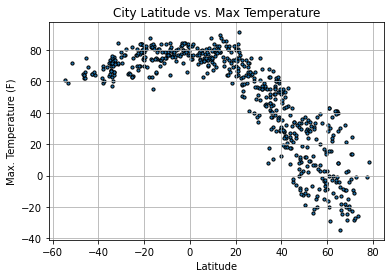

In [29]:
# Build a scatter plot for lat v max temp
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

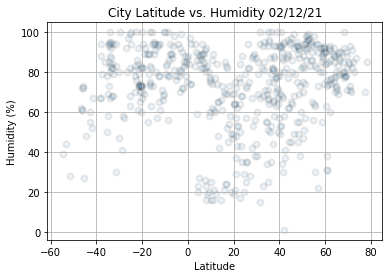

In [33]:
# Build a scatter plot for latitude v humidity
plt.scatter(city_data_df["Lat"],
           city_data_df["Humidity"],
           edgecolor="black", linewidths=2, marker="o",
           alpha=.08, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

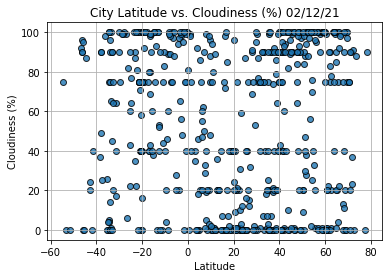

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
           city_data_df["Cloudiness"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

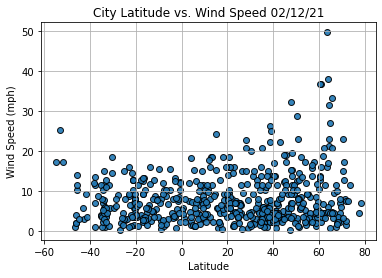

In [39]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
           city_data_df["Wind Speed"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=.9, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()